In [11]:
import numpy as np
import pandas as pd
import tensorflow as tf
import os
import matplotlib.pyplot as plt

from PIL import Image
from tensorflow import keras


In [8]:
# Veri ön işleme
data_folder = 'data'
infected_folder = os.path.join(data_folder, 'train/infected')
notinfected_folder = os.path.join(data_folder, 'train/notinfected')

images = []  
labels = []

# Infected klasöründeki görüntüler
for filename in os.listdir(infected_folder):
    if filename.endswith(".jpg"):
        img = Image.open(os.path.join(infected_folder, filename))
        img = img.resize((224, 224))  # Görüntü boyutunu ayarlayın
        img = np.array(img)
        if len(img.shape) == 3:  # Renkli görüntüler için
            images.append(img / 255.0)  # Normalizasyon (0-1 aralığında)
            labels.append(1)  # Infected sınıfı etiketi

# Notinfected klasöründeki görüntüler
for filename in os.listdir(notinfected_folder):
    if filename.endswith(".jpg"):
        img = Image.open(os.path.join(notinfected_folder, filename))
        img = img.resize((224, 224))  # Görüntü boyutunu ayarlayın
        img = np.array(img)
        if len(img.shape) == 3:  # Renkli görüntüler için
            images.append(img / 255.0)  # Normalizasyon (0-1 aralığında)
            labels.append(0)  # Notinfected sınıfı etiketi

images = np.array(images)
labels = np.array(labels)


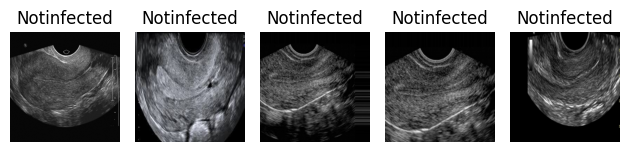

In [27]:
# İlk 15 "Notinfected" görüntüyü görselleştirir
notinfected_indices = [i for i, label in enumerate(labels) if label == 0]

for i in range(5):
    plt.subplot(3, 5, i + 1)  # 3x5 bir alt çerçeve oluşturur
    plt.imshow(images[notinfected_indices[i]])
    plt.title("Notinfected")
    plt.axis('off')

plt.tight_layout()  # Grafikleri düzenler
plt.show()

In [13]:
# Model Oluşturma
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(keras.layers.MaxPooling2D((2, 2))) 
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
